<a href="https://colab.research.google.com/github/Park20182618/dl17/blob/main/notebook/ch08_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch08: DNN; 심층신경망

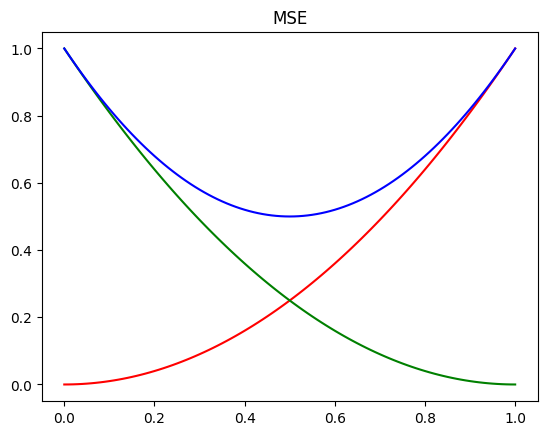

<ipython-input-2-73b451c0015e>:21: RuntimeWarning: divide by zero encountered in log
  y0 = -np.log(1-x)
<ipython-input-2-73b451c0015e>:22: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)


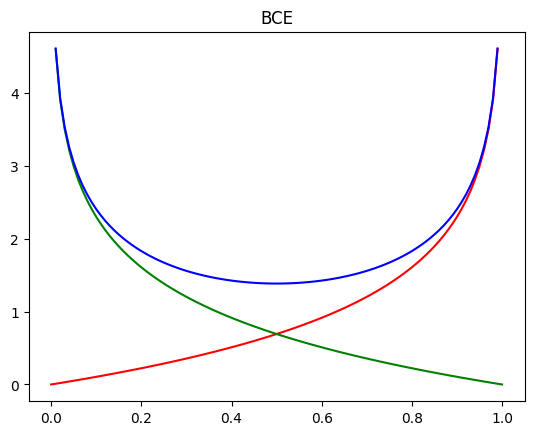

In [2]:
# 손실함수(Loss function)
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) 
y0 = np.square(x)
y1 = np.square(1-x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('MSE')
plt.show() 

# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x)
y1 = -np.log(x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('BCE')
plt.show() 

## 손실함수
- BCE
- CCE(sCCE)
- MSE

In [3]:
# import numpy as np
import tensorflow as tf

# BinaryCrossentropy
y_true = [  [1],   [0],   [0],   [1]]  
y_pred = [[0.8], [0.3], [0.5], [0.9]]   
# y_pred = [[1.0], [0.3], [0.5], [1.0]]   
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())
      
# CategoricalCrossentropy
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
cce = tf.keras.losses.CategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())      

y_true = [ 12 , 20 , 29 , 60 ]
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())

#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )

import numpy as np
custom_loss_function(np.array(y_true), np.array(y_pred)).numpy()


0.3445814
1.936381
9


9

In [4]:
# CategoricalCrossentropy
y_true = [1, 2, 0] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
scce = tf.keras.losses.SparseCategoricalCrossentropy ()
print(scce(y_true, y_pred).numpy ())      

1.936381


Encoding
- int encoding
- one-hot encoding

In [5]:
import numpy as np
X = np.array([['Korea', 44, 7200],
		      ['Japan', 27, 4800],
	          ['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
print(X)


[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


In [6]:
# OneHotEncoder
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = onehotencoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX, X), axis = 1)	# X와 XX를 붙인다. 
print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


## One-Hot encoding using Keras

In [7]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)


[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]


In [8]:

#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

print(y_train[:10])

y_train_one_hot = to_categorical(y_train, num_classes = 10) #, dtype ="int32")
y_train_one_hot.shape
y_train_one_hot[:10]
# y_train[:10]


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
[5 0 4 1 9 2 1 3 1 4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 데이터 정규화
- minmax
- standard

In [9]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 

# StandardScaler()
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. 


[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## Nomalization layer

In [10]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))

#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))

tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## Overfitting 처리 : IMDB 데이터 사용

In [11]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000)


17464789/17464789 [==============================] - 0s 0us/step


In [12]:
print(len(train_data[0]),np.unique(train_data[0]).size)
# max(train_data.max())
print(train_data.shape,train_labels.shape)
train_labels[:10]

218 97
(25000,) (25000,)


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [13]:
train_data[0], max(train_data.max())

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  2,
  2,
  65,
  458,
  2,
  66,
  2,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  2,
  2,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2,
  19,
  14,
  22,
  4,
  2,
  2,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  2,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2,
  2,
  16,
  480,
  66,
  2,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  2,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  2,
  15,
  256,
  4,
  2,
  7,
  2,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  2,
  13,
  104,
  88,
  4,
  381,
  15,
  297,
  98,
  3

Epoch 1/20
49/49 [==============================] - 2s 14ms/step - loss: 0.5613 - accuracy: 0.7282 - val_loss: 0.4328 - val_accuracy: 0.8148
Epoch 2/20
49/49 [==============================] - 0s 7ms/step - loss: 0.3679 - accuracy: 0.8465 - val_loss: 0.3500 - val_accuracy: 0.8497
Epoch 3/20
49/49 [==============================] - 0s 7ms/step - loss: 0.3232 - accuracy: 0.8646 - val_loss: 0.3316 - val_accuracy: 0.8580
Epoch 4/20
49/49 [==============================] - 0s 8ms/step - loss: 0.3078 - accuracy: 0.8715 - val_loss: 0.3280 - val_accuracy: 0.8599
Epoch 5/20
49/49 [==============================] - 0s 7ms/step - loss: 0.2983 - accuracy: 0.8766 - val_loss: 0.3284 - val_accuracy: 0.8601
Epoch 6/20
49/49 [==============================] - 0s 7ms/step - loss: 0.2914 - accuracy: 0.8788 - val_loss: 0.3271 - val_accuracy: 0.8607
Epoch 7/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2876 - accuracy: 0.8805 - val_loss: 0.3277 - val_accuracy: 0.8597
Epoch 8/20
49/49 [=

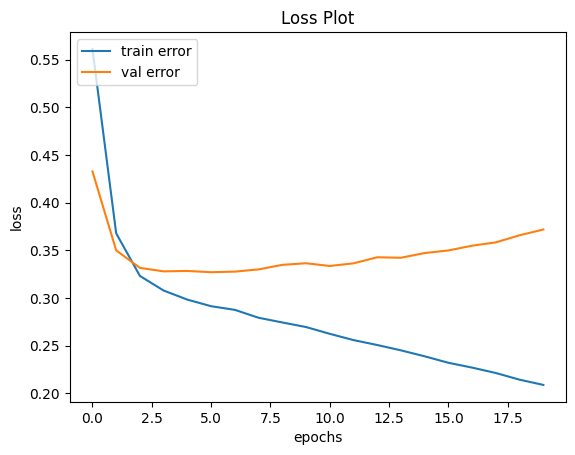

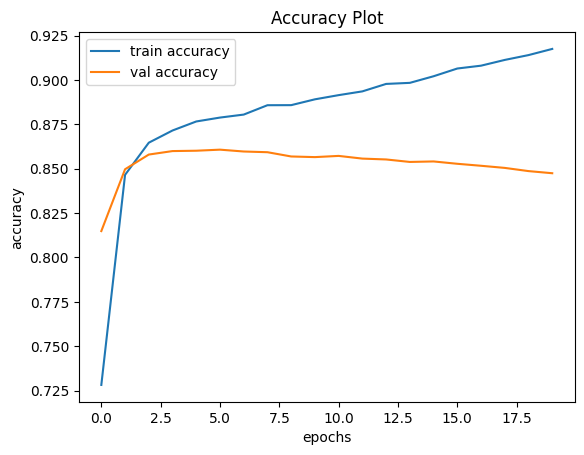

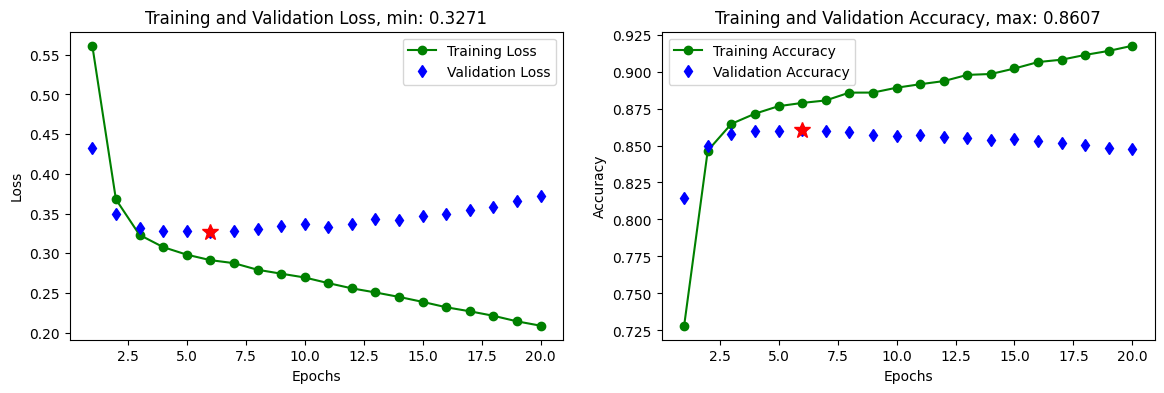

In [14]:
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# train_data.shape,test_data.shape
# train_data[0].shape
# train_data[0]

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=1)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 가중치 규제
- L1
- L2

Epoch 1/20
49/49 - 2s - loss: 0.6193 - accuracy: 0.7123 - val_loss: 0.4766 - val_accuracy: 0.8208 - 2s/epoch - 32ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4101 - accuracy: 0.8490 - val_loss: 0.3841 - val_accuracy: 0.8554 - 329ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3629 - accuracy: 0.8658 - val_loss: 0.3693 - val_accuracy: 0.8604 - 323ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3479 - accuracy: 0.8727 - val_loss: 0.3729 - val_accuracy: 0.8572 - 330ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3436 - accuracy: 0.8727 - val_loss: 0.3652 - val_accuracy: 0.8606 - 307ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3399 - accuracy: 0.8744 - val_loss: 0.3610 - val_accuracy: 0.8601 - 361ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3401 - accuracy: 0.8714 - val_loss: 0.3598 - val_accuracy: 0.8606 - 347ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3334 - accuracy: 0.8753 - val_loss: 0.3612 - val_accuracy: 0.8588 - 334ms/epoch - 7ms/step
Epoch 9/20
49/49 -

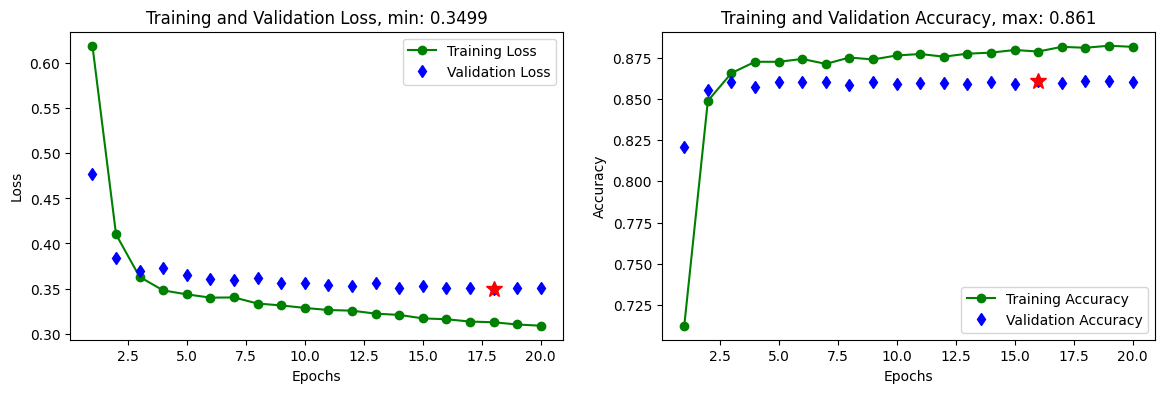

In [16]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Dropout

Epoch 1/20
49/49 - 1s - loss: 0.6799 - accuracy: 0.5568 - val_loss: 0.6253 - val_accuracy: 0.7298 - 1s/epoch - 30ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5877 - accuracy: 0.6847 - val_loss: 0.4617 - val_accuracy: 0.8237 - 349ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4912 - accuracy: 0.7705 - val_loss: 0.3823 - val_accuracy: 0.8486 - 323ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4278 - accuracy: 0.8191 - val_loss: 0.3443 - val_accuracy: 0.8553 - 386ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3935 - accuracy: 0.8353 - val_loss: 0.3309 - val_accuracy: 0.8580 - 369ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3746 - accuracy: 0.8453 - val_loss: 0.3246 - val_accuracy: 0.8595 - 323ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3637 - accuracy: 0.8537 - val_loss: 0.3229 - val_accuracy: 0.8588 - 320ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3496 - accuracy: 0.8616 - val_loss: 0.3210 - val_accuracy: 0.8608 - 365ms/epoch - 7ms/step
Epoch 9/20
49/49 -

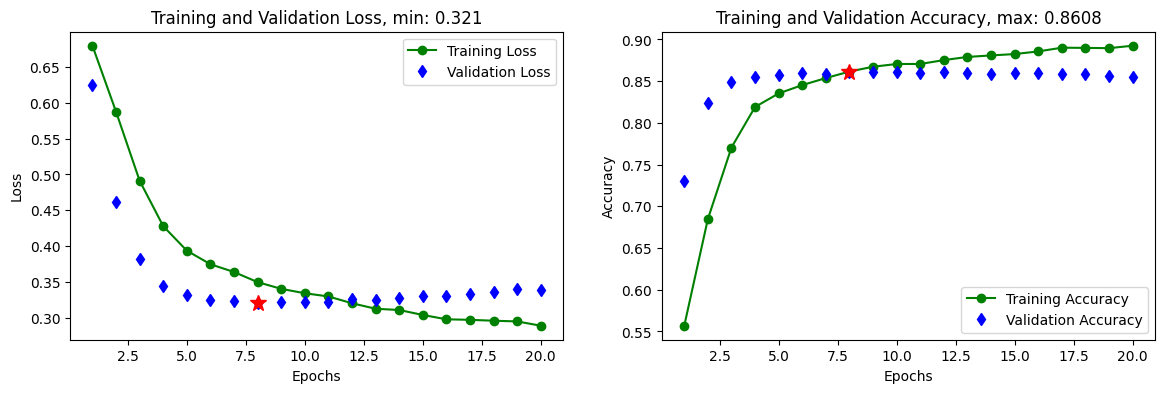

In [17]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## DNN 응용의 예
- MNIST 
- Fashion MNIST
- Titanic survival

(60000, 28, 28) (60000,)
Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2198 - accuracy: 0.9352 - val_loss: 0.1053 - val_accuracy: 0.9676
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0969 - accuracy: 0.9702 - val_loss: 0.0845 - val_accuracy: 0.9734
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0675 - accuracy: 0.9782 - val_loss: 0.0660 - val_accuracy: 0.9785
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0529 - accuracy: 0.9827 - val_loss: 0.0675 - val_accuracy: 0.9796
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0416 - accuracy: 0.9863 - val_loss: 0.0610 - val_accuracy: 0.9823
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0765 - val_accuracy: 0.9788
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0311 - accuracy: 0.9899 - 

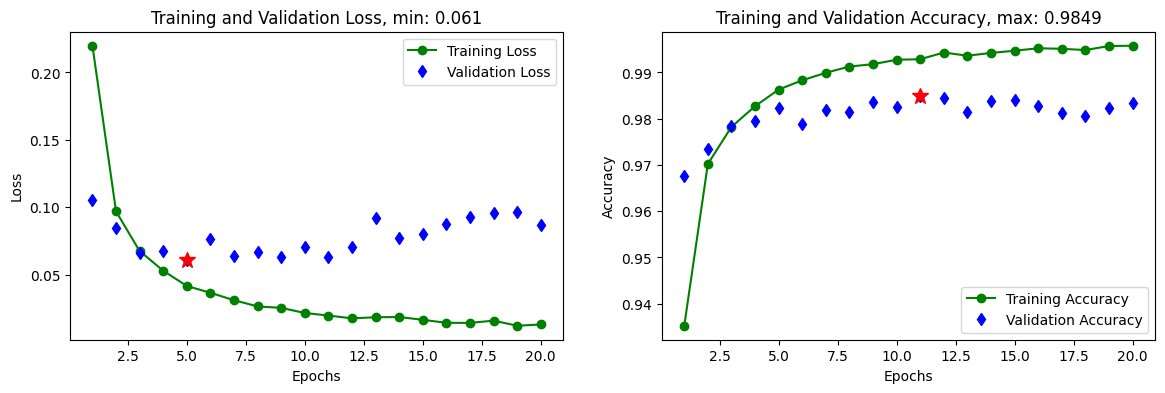

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape,y_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### Fashion MNIST

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4964 - accuracy: 0.8256 - val_loss: 0.4415 - val_accuracy: 0.8407
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3761 - accuracy: 0.8645 - val_loss: 0.4022 - val_accuracy: 0.8571
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3385 - accuracy: 0.8773 - val_loss: 0.4016 - val_accuracy: 0.8540
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3164 - accuracy: 0.8838 - val_loss: 0.3530 - val_accuracy: 0.8744
Epoch 5/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2969 - accuracy: 0.8905 - val_loss: 0.3524 - val_accuracy: 0.8711
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2825 - accuracy: 0.8950 - val_loss: 0.3338 - val_accuracy: 0.8807
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - los

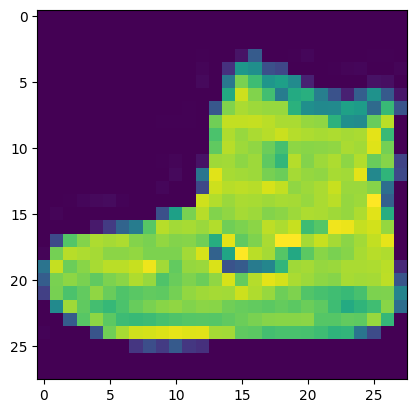

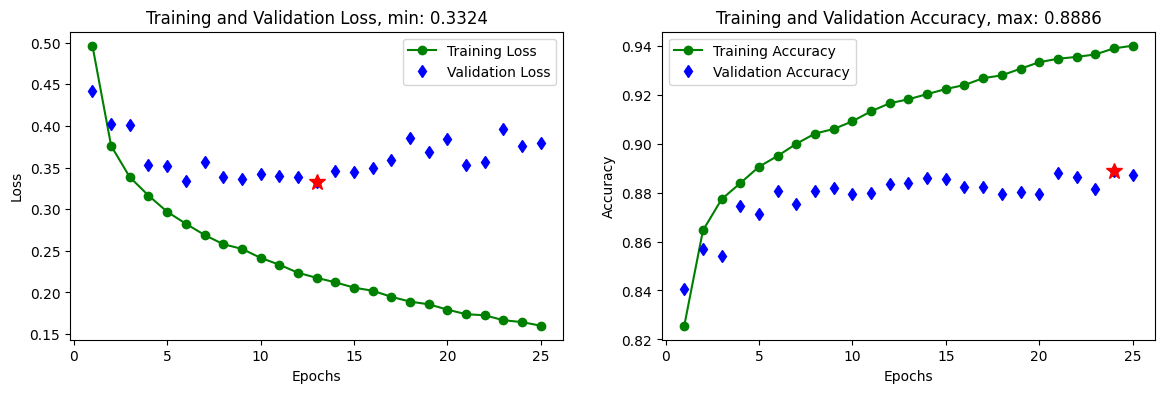

In [19]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# print(train_images.shape,train_labels.shape)
# print(train_labels[:10])

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
          epochs=25,
          validation_data=(test_images, test_labels),
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 타이타닉 생존 예측

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("/content/drive/MyDrive/dl17/train.csv", sep=',')
test = pd.read_csv("/content/drive/MyDrive/dl17/test.csv", sep=',')
# print(train.shape)
# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
# print(train.shape)
# train.head()
train.isna().sum()
train.duplicated().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)
train.shape
# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

train.head()
# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 
target.shape
# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 
train.shape
train.head()
# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)

Epoch 1/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5906 - accuracy: 0.6644
Epoch 2/30
891/891 [==============================] - 1s 2ms/step - loss: 0.5163 - accuracy: 0.7890
Epoch 3/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4981 - accuracy: 0.7868
Epoch 4/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4895 - accuracy: 0.7868
Epoch 5/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4859 - accuracy: 0.7868
Epoch 6/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4791 - accuracy: 0.7834
Epoch 7/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4746 - accuracy: 0.7868
Epoch 8/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4725 - accuracy: 0.7890
Epoch 9/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4745 - accuracy: 0.7856
Epoch 10/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4687 - accuracy: 0.7890

In [21]:
test.shape, test.columns

((418, 11),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [22]:
######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################
# test model
# 필요없는 컬럼을 삭제한다.
test = pd.read_csv("/content/drive/MyDrive/dl17/test.csv", sep=',')

test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

# 결손치가 있는 데이터 행은 삭제한다. 
test.isna().sum()
test.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in test.index:
    if test.loc[ix, 'Sex']=="male":
       test.loc[ix, 'Sex']=1 
    else:
       test.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
# target_test = np.ravel(test.Survived) 
# 생존여부를 학습 데이터에서 삭제한다. 
# test.drop(['Survived'], inplace=True, axis=1)
test = test.astype(float)     
test.shape   # (418,2)
# 학습된 model을 이용해서 tset 데이터에 대한 생존 예측
pred_test = model.predict(test, batch_size=1)
# Survival
print(np.where(pred_test >= 0.5)[0].size)  # 152
# Dead
print(np.where(pred_test < 0.5)[0].size)   # 266




418/418 [==============================] - 1s 1ms/step
152
266
